In [2]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np

data = load_iris(as_frame=True)
print(data.keys())
df = data['frame']
df['name'] = df['target'].map(lambda x : data['target_names'][x])
df

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [3]:
df.iloc[:,[0, 1, 2, 3, 5]]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


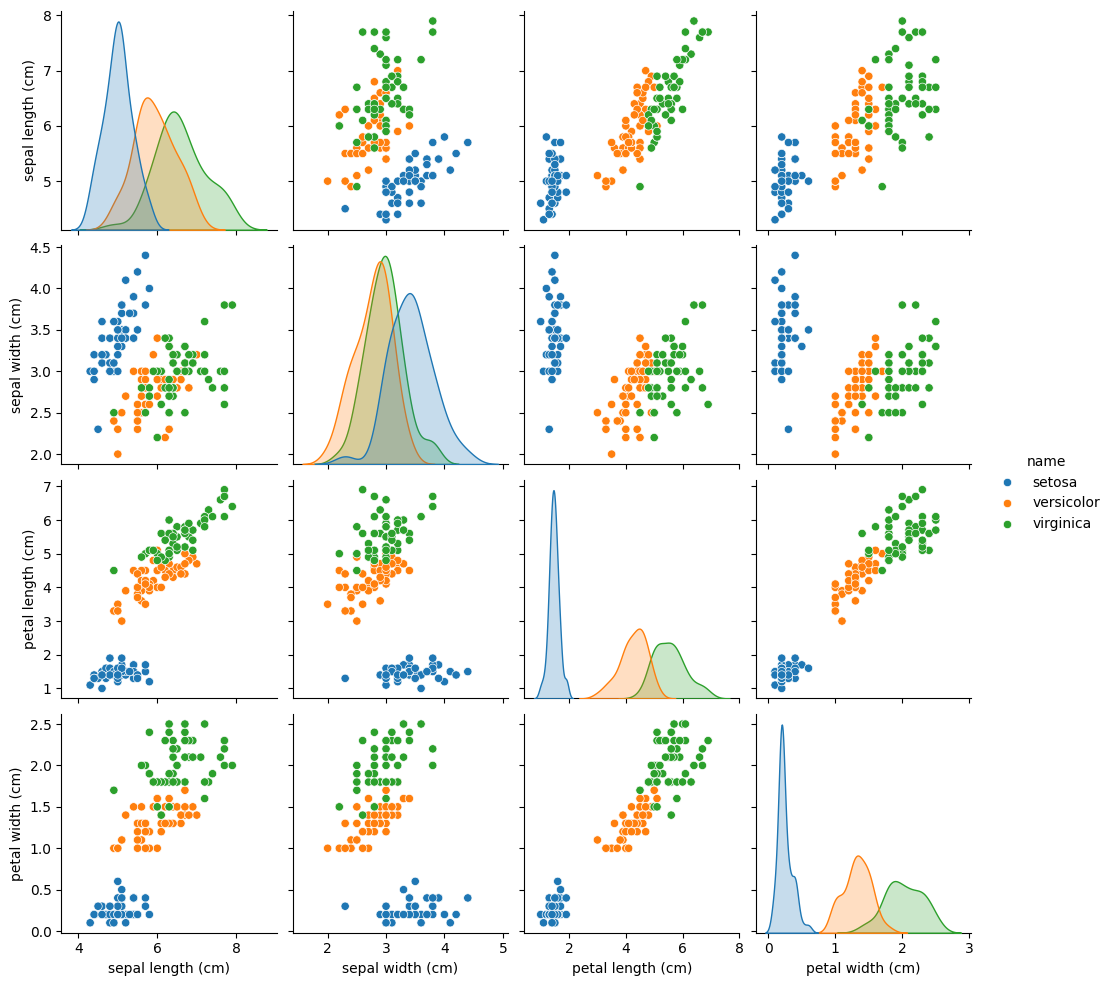

In [4]:
import seaborn as sns

sns.pairplot(df.iloc[:,[0, 1, 2, 3, 5]], hue='name')

In [5]:
df.iloc[:,[0, 1, 2, 3, 5]].groupby('name').corr()

sepal length (cm)  sepal width (cm)  \
name                                                                
setosa     sepal length (cm)           1.000000          0.742547   
           sepal width (cm)            0.742547          1.000000   
           petal length (cm)           0.267176          0.177700   
           petal width (cm)            0.278098          0.232752   
versicolor sepal length (cm)           1.000000          0.525911   
           sepal width (cm)            0.525911          1.000000   
           petal length (cm)           0.754049          0.560522   
           petal width (cm)            0.546461          0.663999   
virginica  sepal length (cm)           1.000000          0.457228   
           sepal width (cm)            0.457228          1.000000   
           petal length (cm)           0.864225          0.401045   
           petal width (cm)            0.281108          0.537728   

                              petal length (cm)  petal width (cm)  
name                                                               
setosa     sepal length (cm)           0.267176          0.278098  
           sepal width (cm)            0.177700          0.232752  
           petal length (cm)           1.000000          0.331630  
           petal width (cm)            0.331630          1.000000  
versicolor sepal length (cm)           0.754049          0.546461  
           sepal width (cm)            0.560522          0.663999  
           petal length (cm)           1.000000          0.786668  
           petal width (cm)            0.786668          1.000000  
virginica  sepal length (cm)           0.864225          0.281108  
           sepal width (cm)            0.401045          0.537728  
           petal length (cm)           1.000000          0.322108  
           petal width (cm)            0.322108          1.000000

In [6]:
# Оставляем versicolor, verginica

df = df[df['name'] != "setosa"].reset_index(drop=True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,7.0,3.2,4.7,1.4,1,versicolor
1,6.4,3.2,4.5,1.5,1,versicolor
2,6.9,3.1,4.9,1.5,1,versicolor
3,5.5,2.3,4.0,1.3,1,versicolor
4,6.5,2.8,4.6,1.5,1,versicolor
...,...,...,...,...,...,...
95,6.7,3.0,5.2,2.3,2,virginica
96,6.3,2.5,5.0,1.9,2,virginica
97,6.5,3.0,5.2,2.0,2,virginica
98,6.2,3.4,5.4,2.3,2,virginica


In [7]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def make_meshgrid(x, y, h=.02):
    d = 1
    x_min, x_max = x.min() - d, x.max() + d
    y_min, y_max = y.min() - d, y.max() + d
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy
    

['setosa' 'versicolor' 'virginica']


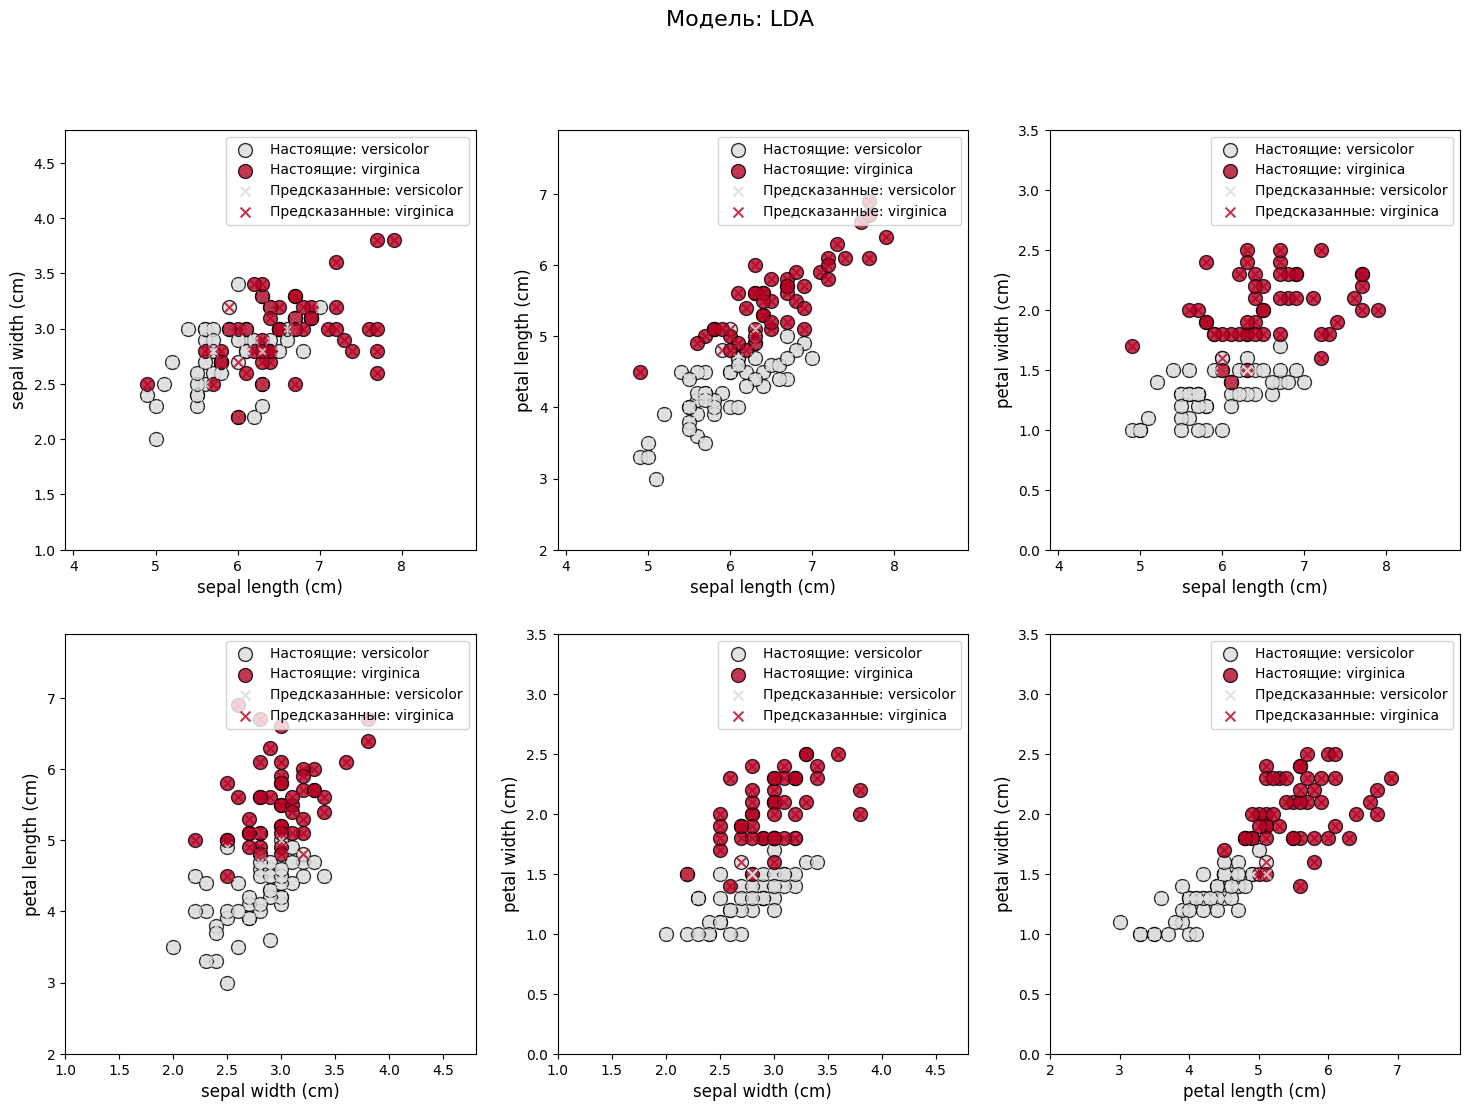

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from itertools import combinations

X = df.iloc[:, :4]
Y = df.iloc[:, 4]

models = [LinearDiscriminantAnalysis()]
names = ["LDA"]

class_names = data.target_names
print(class_names)
class_colors = plt.cm.coolwarm(np.linspace(0, 1, len(class_names)))


for clf in models:
    clf.fit(X, Y)

for model, name in zip(models, names):
    fig, axs = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle(f"Модель: {name}", fontsize=16)
    y_pred = model.predict(X)
    
    for (i, (f1, f2)), ax in zip(enumerate(combinations(range(X.shape[1]), 2)), axs.flat):
        X0, X1 = X.iloc[:, f1], X.iloc[:, f2]
        
        d = 1
        
        for class_idx in set(df['target']):
            ax.scatter(X0[Y == class_idx], X1[Y == class_idx],
                       color=class_colors[class_idx],
                       label=f"Настоящие: {class_names[class_idx]}", 
                       s=100, alpha=0.8, edgecolors='k')
            
        for class_idx in set(df['target']):
            ax.scatter(X0[y_pred == class_idx], X1[y_pred == class_idx],
                       color=class_colors[class_idx],
                       label=f"Предсказанные: {class_names[class_idx]}", 
                       s=50, alpha=0.8, marker='x')
            
        ax.set_xlim(X0.min() - d, X0.max() + d)
        ax.set_ylim(X1.min() - d, X1.max() + d)
        ax.set_xlabel(X0.name, fontsize=12)
        ax.set_ylabel(X1.name, fontsize=12)
        
        ax.legend(loc="upper right", fontsize=10)
        


In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin

class QDA(BaseEstimator, ClassifierMixin):

    def __init__(self):
        self.means_ = None  # Средние значения для двух классов
        self.covariances_ = None  # Ковариационные матрицы для двух классов
        self.priors_ = None  # Априорные вероятности для двух классов
        self.A_ = None  # Квадратичный член (A)
        self.b_ = None  # Линейный член (b)
        self.c_ = None  # Свободный член (c)

    def fit(self, X, y):
        self.classes_ = np.unique(y)

        n_features = X.shape[1]

        self.means_ = np.zeros((2, n_features))
        self.covariances_ = np.zeros((2, n_features, n_features))
        self.priors_ = np.zeros(2)

        for idx, c in enumerate(self.classes_):
            X_c = X[y == c]
            
            # Вычисляем среднее значение для текущего класса
            self.means_[idx] = X_c.mean(axis=0)
            
            # Вычисляем ковариационную матрицу для текущего класса
            self.covariances_[idx] = np.cov(X_c, rowvar=False)
            
            # Вычисляем априорную вероятность для текущего класса
            self.priors_[idx] = X_c.shape[0] / X.shape[0]

        inv_cov_0 = np.linalg.inv(self.covariances_[0])
        inv_cov_1 = np.linalg.inv(self.covariances_[1])

        # Квадратичный член (A)
        self.A_ = 0.5 * (inv_cov_0 - inv_cov_1)

        # Линейный член (b)
        self.b_ = np.dot(self.means_[1].T, inv_cov_1) - np.dot(self.means_[0].T, inv_cov_0)

        # Свободный член (c)
        self.c_ = 0.5 * (
            np.dot(self.means_[0].T, np.dot(inv_cov_0, self.means_[0])) -
            np.dot(self.means_[1].T, np.dot(inv_cov_1, self.means_[1]))
        ) + np.log(self.priors_[1] / self.priors_[0]) - 0.5 * (
            np.log(np.linalg.det(self.covariances_[1])) -
            np.log(np.linalg.det(self.covariances_[0]))
        )

        return self

    def predict(self, X):
        """
        Предсказывает метки классов для объектов X.
        """
        delta_l = np.sum(np.dot(X, self.A_) * X, axis=1) + np.dot(X, self.b_) + self.c_
        
        return self.classes_[(delta_l > 0).astype(int)]

    def predict_proba(self, X):
        """
        Возвращает вероятности принадлежности объектов к каждому классу.
        """
        delta_l = np.sum(np.dot(X, self.A_) * X, axis=1) + np.dot(X, self.b_) + self.c_
        
        # Преобразуем разность в вероятности с помощью сигмоидной функции
        proba_class_1 = 1 / (1 + np.exp(-delta_l))
        proba_class_0 = 1 - proba_class_1
        
        return np.vstack((proba_class_0, proba_class_1)).T

In [21]:
X = df.iloc[:, :2]
Y = df.iloc[:, 4]

qda = QDA()
qda.fit(X, Y)

QDA()

Text(0.5, 1.0, 'QDA')

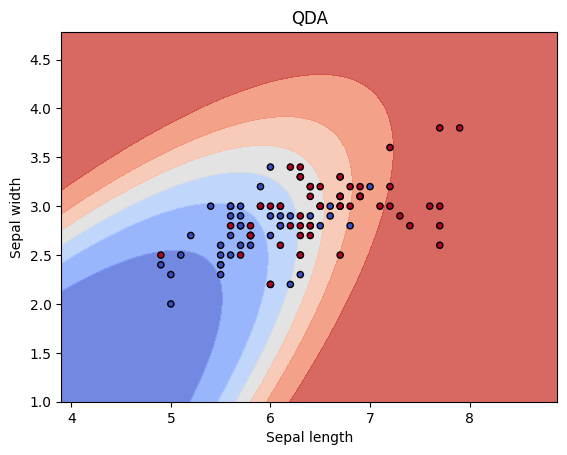

In [22]:
X0, X1 = X.iloc[:, 0], X.iloc[:, 1]

xx, yy = make_meshgrid(X0, X1)

ax = plt.subplot()
plot_contours(ax, qda, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_title("QDA")

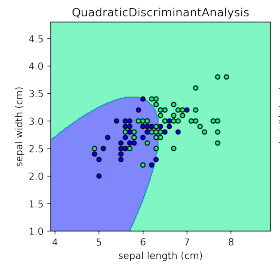

d:\code\mlhw\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'QDA')

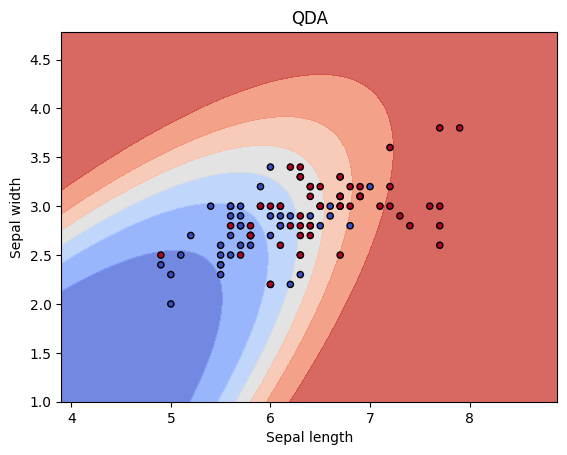

In [23]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model = QuadraticDiscriminantAnalysis()
model.fit(X, Y)
ax = plt.subplot()
plot_contours(ax, model, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_title("QDA")